# Gradiant Descent

- One of Machine Learning's most popular algorithms
- Gradiente descent is an optimization algorithm for finding a local minimum of a differenciable function
- Used when training data models based on experience

Given a differenciable function with, at least, a local minimum $y$
$$ y = f(x) $$
The algorithm follow the steps shown below:
- Choose random $x_i$ value
-Apply the following formula:
$$y_j = y_j - n \frac{\partial}{\partial y_j}$$
until $y_j$ can be considerated as non-changing value.

Thus, the result $X_i$ the the location of the local minimum

## Example 1, a squared two-dimentions function

In this example, it is required to find the minimum of the function:
$$y = x^2-2x-1$$

In [1]:
import numpy as np
from numpy import linspace
import matplotlib.pyplot as plt
import random

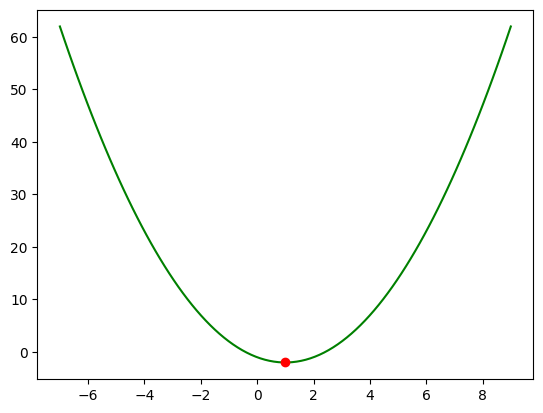

In [9]:
X = linspace(-7, 9, 100)
y = X ** 2 - 2 * X - 1
plt.plot(X, y, 'g-', 1, -2, 'ro')

We know by the graph that the minimum is located in $f(1) = 0$

In [15]:
X_ini = 100 * np.random.rand()
alpha = 0.1
n_ite = 50
X_i = X_ini
print("x_ini = %.4f" % X_ini)
grad_Vector = []
for i in range(n_ite):
    grad = 2 * X_i - 2
    grad_Vector.append(grad)
    X_i = X_i - alpha * grad
else: print("Result after %d attemps:" % (i + 1), "X_i = %.4f" % X_i, "grad = %.4f" % grad)

x_ini = 28.8400
Result after 50 attemps: X_i = 1.0004 grad = 0.0010


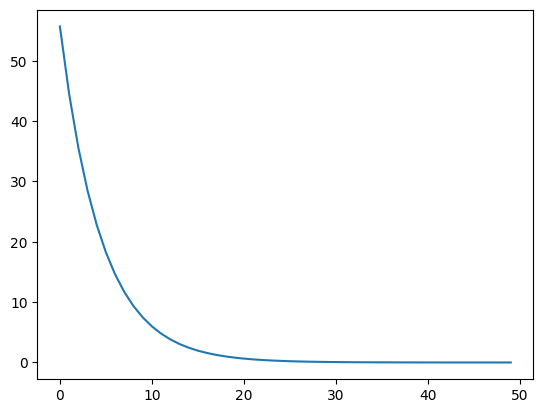

In [16]:
plt.plot(grad_Vector)

## Gradient descent by matrix multiplication

Extending the concept of the algorithm, The goal of gradient descent is to find the minimum of the objective function, in this case, the sum-of-squares error. A derivative tells you the slope of a function. So, just walk down (descent) the slope and you will eventually reach the bottom.

The "gradient" in gradient descent is a technical term, which refers to the partial derivative of the objective function across all the descriptors.

The representation of the multi-dimensional linear model has the following form:

$$y = XW + bias + \epsilon$$

Where $X(n \times p)$ is the observed data, $W(p \times 1)$ is the weights, $y(n \times 1)$ is the predictable value and $\epsilon(n \times 1)$ is the error.

Each data point is represented by a $(p \times 1)$ vector, so __*to add new data to the matrix, transpose the p-vector and append it to the bottom of the design matrix.*__

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd

import matplotlib.pylab as plt
import seaborn as sns
import matplotlib as mpl
label_size = 13
mpl.rcParams['xtick.labelsize'] = label_size 
mpl.rcParams['ytick.labelsize'] = label_size
mpl.rcParams.update({'figure.autolayout': True})

In [9]:
X_grid = np.mgrid[0:10:1, 0:10:1].reshape(2,-1).T
X = np.concatenate((X_grid,np.tile(1,[100,1])),axis=1)
true_weights = np.array([[5],[-1.5],[3]])
epsilon = np.random.normal(loc=0,scale=1,size=[100,1])
y = np.matmul(X, true_weights) + epsilon

### About de bias

The goal of gradient descent is to iteratively learn the true weights. A quick note is that the bias term can be conveniently wrapped into XW by right-appending a column of ones to X and appending another predictor to the bottom of W. This makes sense if you consider $(n \times p + 1) \times (p \times 1) = n \times 1$

Let's initialize learned weights randomly:

In [11]:
learned_weights = np.random.normal(loc=1,scale=1,size=[3,1])
orig_learned_weights = learned_weights.copy() #Reference value

### Define the gradient

The first step is to define the gradient of the objective function. The objective function we optimize is the sum-of-squares error between the true and learned weights.


$$obj = \frac{1}{2} \sum_{i = i}^{n}(\hat{y}-y)^2$$

Which can be written as

$$obj = \frac{1}{2} \sum_{i = i}^{n}(XW-y)^2$$

And, then

$$\nabla obj = \sum_{i = i}^{n}(\hat{y}-y)D(XW)$$

where D refers to the matrix derivative, in our case, with respect to W.

So at each epoch (training iteration), we will update each weight according to

$$ \omega_j = \omega_j - learning\space rate \times \nabla obj_j$$

Thus at each step, each weight is updated by moving opposite the gradient (subtraction) toward the minimum of the objective function by a step size defined by the learning rate.

### Variable updates through matrix multiplication

Consider two arbritary matrixes $X_{3 \times 2}$ and $W_{2 \times 1}$ fo the form:

$$ X =  \begin{bmatrix}
x_1 & x_4 \\
x_2 & x_5 \\
x_3 & x_6 
\end{bmatrix}  $$

$$W =  \begin{bmatrix}
w_1 \\
w_2 
\end{bmatrix}  $$

Then

$$ XW =  \begin{bmatrix}
x_1w_1+x_4w_2 \\
x_2w_1+x_5w_2 \\
x_3w_1+x_6w_2 
\end{bmatrix}  $$

Taking the partial derivative of each weight gives

$$
\frac{\partial XW}{\partial w_1} = 
\begin{bmatrix}
\frac{\partial (x_1w_1+x_4w_2)}{\partial w_1} \\
\frac{\partial (x_2w_1+x_5w_2)}{\partial w_1} \\
\frac{\partial (x_3w_1+x_6w_2)}{\partial w_1} 
\end{bmatrix} = 
\begin{bmatrix}
x_1\\
x_2 \\
x_3 
\end{bmatrix}
$$

$$
\frac{\partial XW}{\partial w_2} = 
\begin{bmatrix}
\frac{\partial (x_1w_1+x_4w_2)}{\partial w_2} \\
\frac{\partial (x_2w_1+x_5w_2)}{\partial w_2} \\
\frac{\partial (x_3w_1+x_6w_2)}{\partial w_2} 
\end{bmatrix} = 
\begin{bmatrix}
x_4\\
x_5 \\
x_6 
\end{bmatrix}
$$

It can be simplified as

$$
\frac{\partial XW}{\partial w_1} = X
\begin{bmatrix}
1 \\
0 
\end{bmatrix}
$$

$$
\frac{\partial XW}{\partial w_2} = X
\begin{bmatrix}
0 \\
1 
\end{bmatrix}
$$


So the parital derivatives of all weights can be effectively computed by using a $(p+1 \times p+1)$ diagonal matrix of ones. First, let's use this trick to figure out how to compute $D(WX)$ in matrix form.



In [16]:
ones = np.zeros((3, 3))
np.fill_diagonal(ones, 1)
print(ones, '\n')

diag_ones = ones.reshape((3,3,1))
print(diag_ones)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]] 

[[[1.]
  [0.]
  [0.]]

 [[0.]
  [1.]
  [0.]]

 [[0.]
  [0.]
  [1.]]]


In [17]:
deltaXW_deltaW = np.matmul(X,diag_ones)
print(deltaXW_deltaW.reshape((3,100)).shape)
y_hat_minus_y = np.matmul(X,learned_weights) - y
print(y_hat_minus_y.shape)

(3, 100)
(100, 1)


The matrices are of the right dimension to compute the gradients across all weights simultaneously.

In [18]:
learning_rate = 0.001
num_samples = X.shape[0]
learned_weights=orig_learned_weights.copy()

In [19]:
epoch_num = 10000
weight_updates = np.zeros((epoch_num + 1,3))
weight_updates[0,:] = orig_learned_weights.transpose()
loss = np.zeros(epoch_num + 1)
loss[0] = np.sum(np.square(true_weights - learned_weights))
for epoch in range(epoch_num):
    y_hat_minus_y = np.matmul(X,learned_weights) - y
    gradient = np.matmul(deltaXW_deltaW.reshape((3,100)),y_hat_minus_y)
    gradient_step = gradient/num_samples*learning_rate
    learned_weights = learned_weights - gradient_step
    loss[epoch+1] = np.sum(np.square(true_weights - learned_weights))
    weight_updates[epoch+1,:] = learned_weights.transpose()

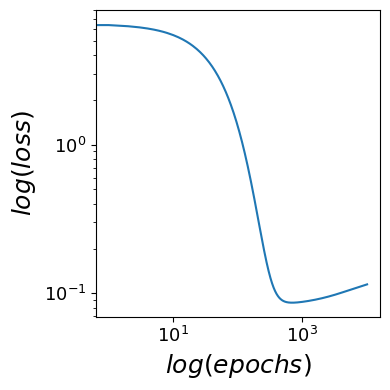

In [20]:
fig, ax = plt.subplots(figsize=(4,4))
ax.loglog(loss)
ax.set_xlabel('$log(epochs)$',fontsize=18)
ax.set_ylabel('$log(loss)$',fontsize=18)
plt.show()

As shown in the plot above, the loss is monotonically decreasing over all epochs. Thus, the algorithm effectively descends the gradient to the true weights. Let's see how that happens by plotting each of the three weights

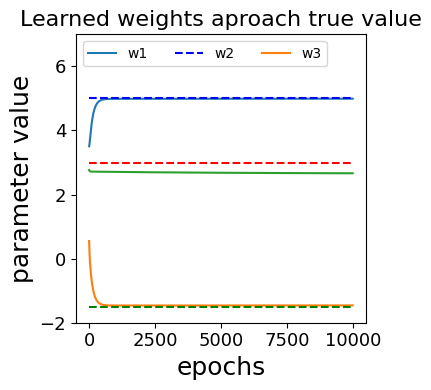

In [21]:
fig, ax = plt.subplots(figsize=(4,4))
ax.plot(weight_updates[:,0])
ax.hlines(5,0,10000,linestyles='dashed',color='blue')
ax.plot(weight_updates[:,1])
ax.hlines(3,0,10000,linestyles='dashed',color='red')
ax.plot(weight_updates[:,2])
ax.hlines(-1.5,0,10000,linestyles='dashed',color='green')
ax.set_ylim([-2,7])
ax.set_xlabel('epochs',fontsize=18)
ax.set_ylabel('parameter value',fontsize=18)
ax.legend(('w1','w2','w3'),loc=2,ncol=3)
ax.set_title('Learned weights aproach true value',fontsize=16)
plt.show()

Each weight asymptotically approaches the true value (indicated by dashed line), validating the approach. As an aside, increasing the learning rate by a factor of 50 (learningrate=0.05) gives an overflow error, so some thought should be given as to what it should be set to

### Processing time approach

In [22]:
%%time
for epoch in range(int(1e5)):
    y_hat_minus_y = np.matmul(X,learned_weights) - y
    gradient = np.matmul(deltaXW_deltaW.reshape((3,100)),y_hat_minus_y)
    gradient_step = gradient/num_samples*learning_rate
    learned_weights = learned_weights - gradient_step
    #print np.sum(np.square(true_weights - orig_learned_weights))
    #print np.sum(np.square(true_weights - learned_weights))

CPU times: total: 1.5 s
Wall time: 1.48 s


In [23]:
%%time
# Initialize variables
learned_weights = orig_learned_weights.copy()
y_hat_minus_y = np.zeros((num_samples,1))
gradient = np.zeros((X.shape[1],1))
gradient_step = np.zeros((X.shape[1],1))
for epoch in range(10000):
    for i in range(X.shape[0]):
        y_hat_minus_y[i] = (X[i,0] * learned_weights[0] + X[i,1] * learned_weights[1] + X[i,2] * learned_weights[2]) - y[i]
    for j in range(X.shape[1]):
        gradient[j] = np.sum(y_hat_minus_y * X[:,j].reshape(num_samples,1))
        gradient_step[j] = gradient[j]/num_samples*learning_rate
        learned_weights[j] = learned_weights[j] - gradient_step[j]

CPU times: total: 12.6 s
Wall time: 12.7 s
